In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("../data/preprocessed_data.csv")
df.head()

,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length,description_length,tags_count,channel_title_mean_views,channel_title_max_views,channel_title_min_views,channel_title_mean_comments,channel_title_max_comments,channel_title_min_comments
0,22,1514614.0,156908.0,696.438236,35313,1958.0,1,2,1,34,361,143,1.713608e+06,3958226.0,480970.0,18033.333333,45574,1471
1,20,2381688.0,146739.0,1095.129578,16549,566.0,1,0,1,60,715,448,2.419552e+06,7003748.0,402885.0,8378.864811,27451,1324
2,24,2038853.0,353787.0,937.489807,40221,4918.0,3,0,1,53,513,384,2.159255e+06,6582365.0,344173.0,18964.178862,207849,1764
3,10,496771.0,23251.0,228.421445,7647,5088.0,1,1,1,56,762,250,1.111062e+06,4274628.0,124775.0,9658.552326,41789,687
4,26,1123889.0,45802.0,516.778052,2196,4004.0,1,0,1,55,2493,415,5.394150e+05,2400821.0,182202.0,1524.144578,4867,384


In [3]:
def apply_log(df, column_names):
    for column_name in column_names:
        df[column_name] = df.apply(lambda row: np.log2(row[column_name]) if row[column_name] != 0 else row[column_name], axis=1)

In [4]:
numerical_features = ['view_count', 'dislikes', 'comment_count', 'days_uploaded', 'title_length', 'channel_title_mean_views', 'channel_title_min_views', 'channel_title_max_views', 'tags_count', 'channel_title_mean_comments', 'channel_title_min_comments', 'channel_title_max_comments']
categorical_features = ['categoryId', 'image_popularity', 'text_popularity']
target = 'likes'

In [5]:
numerical_features.append(target)
apply_log(df, numerical_features)
numerical_features.remove(target)

In [6]:
features = []
features.extend(numerical_features)
features.extend(categorical_features)

In [7]:
X = df[features]
X

,view_count,dislikes,comment_count,days_uploaded,title_length,channel_title_mean_views,channel_title_min_views,channel_title_max_views,tags_count,channel_title_mean_comments,channel_title_min_comments,channel_title_max_comments,categoryId,image_popularity,text_popularity
0,20.530519,9.443852,15.107912,0.000000,5.087463,20.708606,18.875587,21.916423,7.159871,14.138378,10.522582,15.475923,22,1,2
1,21.183553,10.096886,14.014456,0.000000,5.906891,21.206308,18.620009,22.739696,8.807355,13.032539,10.370687,14.744571,20,1,0
2,20.959326,9.872659,15.295661,0.000000,5.727920,21.042102,18.392774,22.650175,8.584963,14.210989,10.784635,17.665176,24,3,0
3,18.922221,7.835554,12.900678,0.000000,5.807355,20.083507,16.928969,22.027367,7.965784,13.237591,9.424166,15.350836,10,1,1
4,20.100068,9.013401,11.100662,0.000000,5.781360,19.041036,17.475179,21.195096,8.696968,10.573784,8.584963,12.248817,26,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245898,19.103856,8.017189,10.831307,2.807355,5.087463,19.240278,17.561907,20.213334,8.005625,12.432614,10.333155,13.854771,23,1,1
245899,21.218798,10.132131,12.508785,2.807355,5.321928,21.845931,18.395120,23.772112,4.700440,14.775480,10.736402,16.271682,20,1,2
245900,18.855541,6.518421,8.422065,2.584963,6.339850,19.662608,16.964792,22.307505,8.826548,10.471738,6.686501,13.147523,17,2,3
245901,19.617442,8.530775,10.945444,2.584963,5.554589,23.416360,18.060005,25.406218,3.700440,14.469762,10.288866,16.320007,24,1,2


In [8]:
y = df[target]
y

0         17.259559
1         17.162893
2         18.432522
3         14.505005
4         15.483123
            ...    
245898    16.072572
245899    16.800205
245900    12.484319
245901    14.850382
245902    15.707009
Name: likes, Length: 245903, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((196722, 15), (49181, 15), (196722,), (49181,))

In [17]:
model = XGBRegressor(n_estimators = 20000, max_depth = 8, learning_rate = 0.01, colsample_bytree = 0.6, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_train, pred_test

(array([17.126505 , 17.231945 , 18.422503 , ..., 16.298319 , 14.693271 ,
        14.1495495], dtype=float32),
 array([14.549639 , 14.9285345, 14.831526 , ..., 12.497235 , 15.065473 ,
        15.430809 ], dtype=float32))

In [19]:
print(f"Train RMSE = {np.sqrt(mean_squared_error(y_train, pred_train))}")
print(f"Test RMSE = {np.sqrt(mean_squared_error(y_test, pred_test))}")

Train RMSE = 0.08144208003726801
Test RMSE = 0.3747740187907055


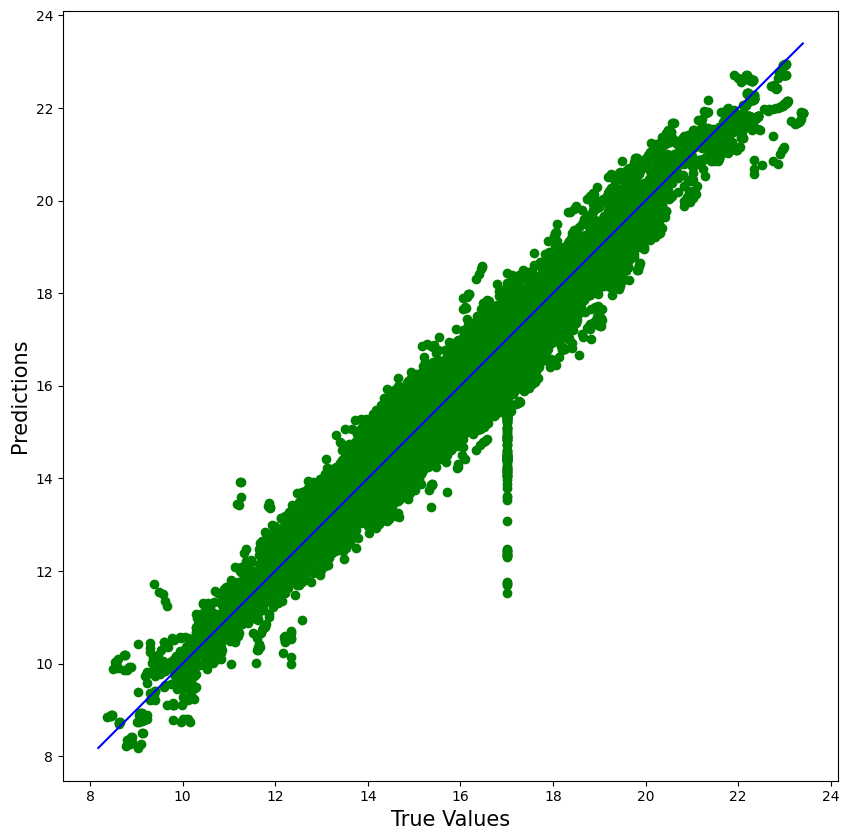

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_test, c='green')

p1 = max(max(pred_test), max(y_test))
p2 = min(min(pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#### Podaci koji se prosleđuju modelu nalaze se u fajlu [preprocessed_data.csv](../data/preprocessed_data.csv). Zbog velikog opsega vrednosti koji uzimaju atributi, prvo je isporbana normalzacija pomoću StandardScaler-a iz sklearn biblioteke, međutim dobijeni rezultati su bili dosta loši. Nakon toga je isprobano logaritmovanje vrednosti i to je dalo dosta bolje rezultate. Treća stvar koja je isprobana je normalizacija pomoću StandardScaler nad logaritmovanim podacima, međutim to je dalo iste rezultate kao kada je rađeno samo logaritmovanje pa StandardScaler nije primenjivan. 

#### Što se tiče kolone koje se prosleđuju modelu, isprobane su različite kombinacije i posmatralo se kako se smanjuje/povećava greška. Najbolji rezultati su dobijeni kada se modelu proslede svi atributi osim starosti kanala i dužine opisa video snimka.

#### Što se tiče hiperparametara modela, i tu su isprobavane različite vrednosti i odabrane su one koje daju najmanju grešku. Za broj iteracija su isprobavane vrednosti 1000, 5000, 10000, 20000, 30000 i primećeno je da se greška posle 20000 iteracije ne smanjuje, već se povećava ili ostaje ista što ukazuje na overfitovanje. Za max_depth su isprobavane vrednosti 10, 8 i 6 i vrednost 8 daje manju grešku, dok vrednost 10 daje istu grešku kao 8 ali su performanse gore. Learning rate je optimizovan zajedno sa brojem iteracijama, i 0.01 vrednost se pokazala kao najbolja. Za colsample_bytree su isprobane vrednosti 0.4, 0.5, 0.6 i 0.7 i najmanja greška je dobijena za 0.6.